In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

IMAGES_DIR = PWD + '/data/plots/cfd_tests/cfd_visualisation/'

import numpy as np
from matplotlib import pyplot as plt

from src.cfd_utils import TIME_STEP
from src.utils import save_plt

In [2]:
dataset = np.load(PWD + f'/data/dataset.npz', allow_pickle=True)

In [3]:
all_channels_data = dataset['dataset'].flat[0]
all_channels_data.keys()

dict_keys([8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [4]:
all_X, all_y = all_channels_data[17][0], all_channels_data[17][1]

all_X.shape, all_y.shape

((19594, 64), (19594,))

In [5]:
N_BASELINE = 20

# Utils

In [6]:
x_time = np.arange(64) * TIME_STEP

def show_waveform(waveform, init=True, figsize=(4.5, 3), legend=False, font_size=None, **kwargs):
    if init and figsize is not None:
        plt.figure(figsize=figsize)
    if init and font_size is not None:
        plt.rc('font', size=font_size)
    plt.plot(x_time, waveform, marker='.', linewidth=1, markersize=5, **kwargs)
    if init:
        plt.ylim(-0.1, 1.1)
        plt.xlabel('time [ns]')
        plt.ylabel('voltage [V]')
        plt.grid()
    if legend:
        plt.legend()

# Step 0. Visualise

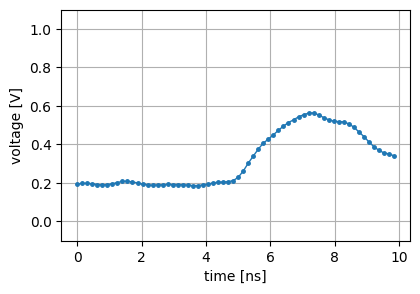

In [7]:
waveform = (all_X[1] / 2.) + 0.2

show_waveform(waveform)
plt.show()

# Step 1. Baseline subtraction

0.19587482511997228


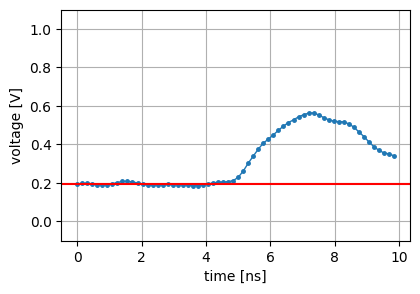

In [8]:
baseline = np.mean(waveform[:N_BASELINE])
print(baseline)

show_waveform(waveform)
plt.axhline(baseline, c='red')
plt.show()

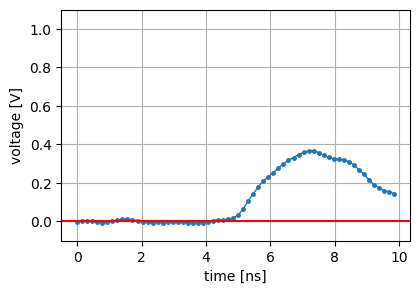

In [9]:
waveform_baseline = waveform - baseline

show_waveform(waveform_baseline)
plt.axhline(0, c='red')
plt.show()

# Step 2. Normalisation

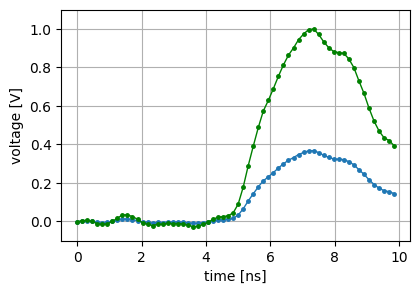

In [10]:
waveform_norm = waveform_baseline / np.max(waveform_baseline)

show_waveform(waveform_baseline)
show_waveform(waveform_norm, init=False, c='green')
plt.show()

# Step 3. Fixed threshold

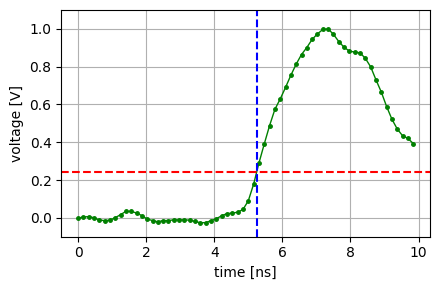

In [11]:
show_waveform(waveform_norm, c='green')

plt.axhline(0.24, c='red', linestyle='--')
plt.axvline(5.245, c='blue', linestyle='--')

plt.tight_layout()
save_plt(IMAGES_DIR + 'cfd_threshold.pdf')
plt.show()

# Together

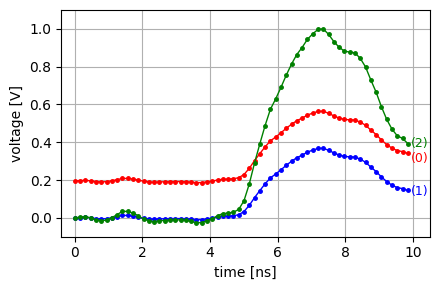

In [12]:
show_waveform(waveform, init=True, c='red', label='default')
show_waveform(waveform_baseline, init=False, c='blue', label='baseline subtracted')
show_waveform(waveform_norm, init=False, legend=False, c='green', label='normalised')

plt.text(9.93, 0.295, '(0)', c='red', fontsize=9)
plt.text(9.93, 0.12, '(1)', c='blue', fontsize=9)
plt.text(9.93, 0.375, '(2)', c='green', fontsize=9)
plt.xlim(-0.4, 10.5)

plt.tight_layout()
save_plt(IMAGES_DIR + 'cfd_together.pdf')
plt.show()